In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
from scipy.ndimage import gaussian_filter


# Read data in brief

In [57]:
# Load Data
climate_data = gpd.read_file("./Shape_Data")
climate_data.head()

STATE_CODE   DISTRICT        GaPa_NaPa     Type_GN Province  \
0           1  TAPLEJUNG  Aathrai Tribeni  Gaunpalika        1   
1           1  TAPLEJUNG       Maiwakhola  Gaunpalika        1   
2           1  TAPLEJUNG        Meringden  Gaunpalika        1   
3           1  TAPLEJUNG       Mikwakhola  Gaunpalika        1   
4           1  TAPLEJUNG     Phaktanglung  Gaunpalika        1   

                                            geometry  
0  POLYGON ((87.60985 27.37043, 87.61107 27.36943...  
1  POLYGON ((87.50402 27.42901, 87.50672 27.42831...  
2  POLYGON ((87.51272 27.56894, 87.51255 27.56859...  
3  POLYGON ((87.68850 27.70975, 87.68891 27.70938...  
4  POLYGON ((87.83673 27.95137, 87.83735 27.95119...

In [58]:
climate_data = climate_data.to_crs(epsg=4326)

# Ploting Temperature Data of Nepal (2020 & 2050)

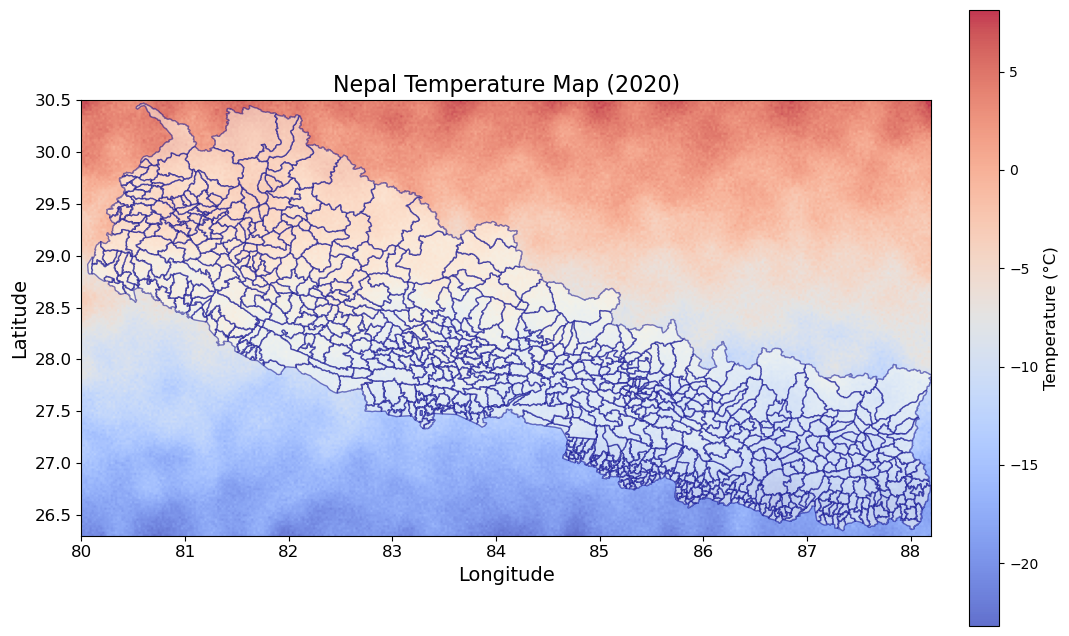

In [61]:
# Load temperature data 2020 (Geotiff)
temp_2020 = r"./Nepal_climate_data/nepal_temperature_2020.tif"
with rasterio.open(temp_2020) as src:
    temp_2020 = src.read(1)  # Reading first band
    extent = src.bounds  # Setting bounding box for the data
    min_temp, max_temp = temp_2020.min(), temp_2020.max()  # Get minimum and maximum temperature value

# Load Nepal map (shapefile)
climate_data = gpd.read_file(r"./Shape_Data/local_unit.shp")

# Create figure and axes with a larger size
fig, ax = plt.subplots(figsize=(12, 8))

# Plot Nepal map (shapefile) with a different color and edge color
climate_data.plot(ax=ax, edgecolor="darkblue", facecolor="ivory", alpha=0.5)

# Plot temperature data (TIFF) with a different colormap and adjusted transparency
im = ax.imshow(temp_2020, cmap="coolwarm", extent=[extent.left, extent.right, extent.bottom, extent.top], alpha=0.8)

# Adding colorbar (Legend) with a different orientation and label size
cbar = plt.colorbar(im, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
cbar.set_label("Temperature (°C)", fontsize=12)
cbar.ax.tick_params(labelsize=10)

# Assigning Labels and title with larger font sizes
ax.set_title("Nepal Temperature Map (2020)", fontsize=16)
ax.set_xlabel("Longitude", fontsize=14)
ax.set_ylabel("Latitude", fontsize=14)

# Adjust tick label sizes
ax.tick_params(axis='both', which='major', labelsize=12)

# Displaying visualization
plt.show()

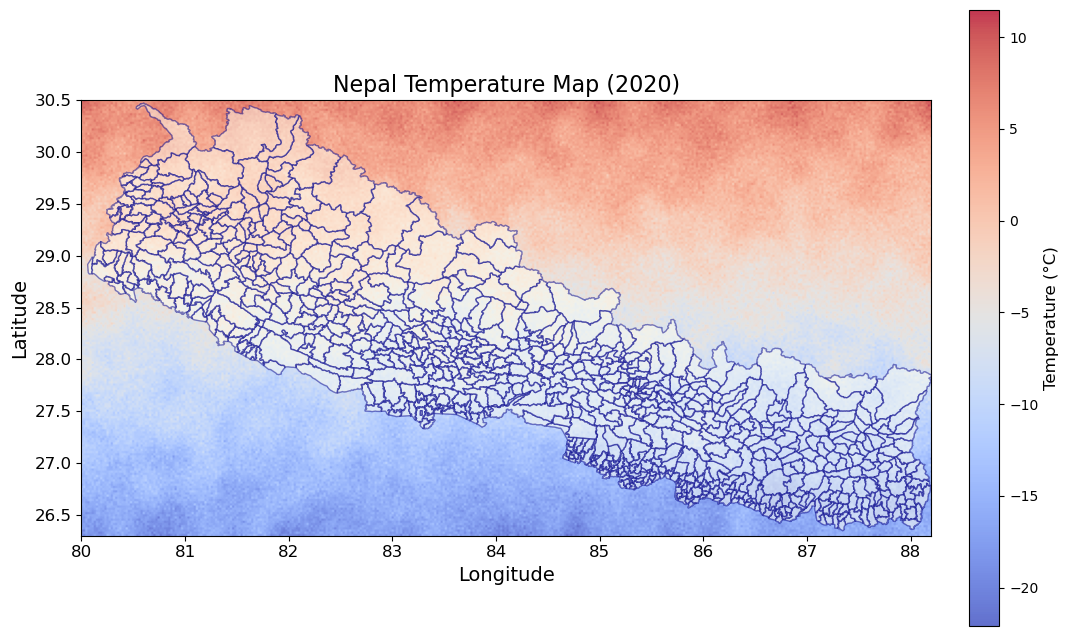

In [63]:
# Load temperature data 2020 (Geotiff)
temp_2050 = r"./Nepal_climate_data/nepal_temperature_2050.tif"
with rasterio.open(temp_2050) as src:
    temp_2050 = src.read(1)  # Reading first band
    extent = src.bounds  # Setting bounding box for the data
    min_temp, max_temp = temp_2050.min(), temp_2050.max()  # Get minimum and maximum temperature value

# Load Nepal map (shapefile)
climate_data = gpd.read_file(r"./Shape_Data/local_unit.shp")

# Create figure and axes with a larger size
fig, ax = plt.subplots(figsize=(12, 8))

# Plot Nepal map (shapefile) with a different color and edge color
climate_data.plot(ax=ax, edgecolor="darkblue", facecolor="ivory", alpha=0.5)

# Plot temperature data (TIFF) with a different colormap and adjusted transparency
im = ax.imshow(temp_2050, cmap="coolwarm", extent=[extent.left, extent.right, extent.bottom, extent.top], alpha=0.8)

# Adding colorbar (Legend) with a different orientation and label size
cbar = plt.colorbar(im, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
cbar.set_label("Temperature (°C)", fontsize=12)
cbar.ax.tick_params(labelsize=10)

# Assigning Labels and title with larger font sizes
ax.set_title("Nepal Temperature Map (2020)", fontsize=16)
ax.set_xlabel("Longitude", fontsize=14)
ax.set_ylabel("Latitude", fontsize=14)

# Adjust tick label sizes
ax.tick_params(axis='both', which='major', labelsize=12)

# Displaying visualization
plt.show()

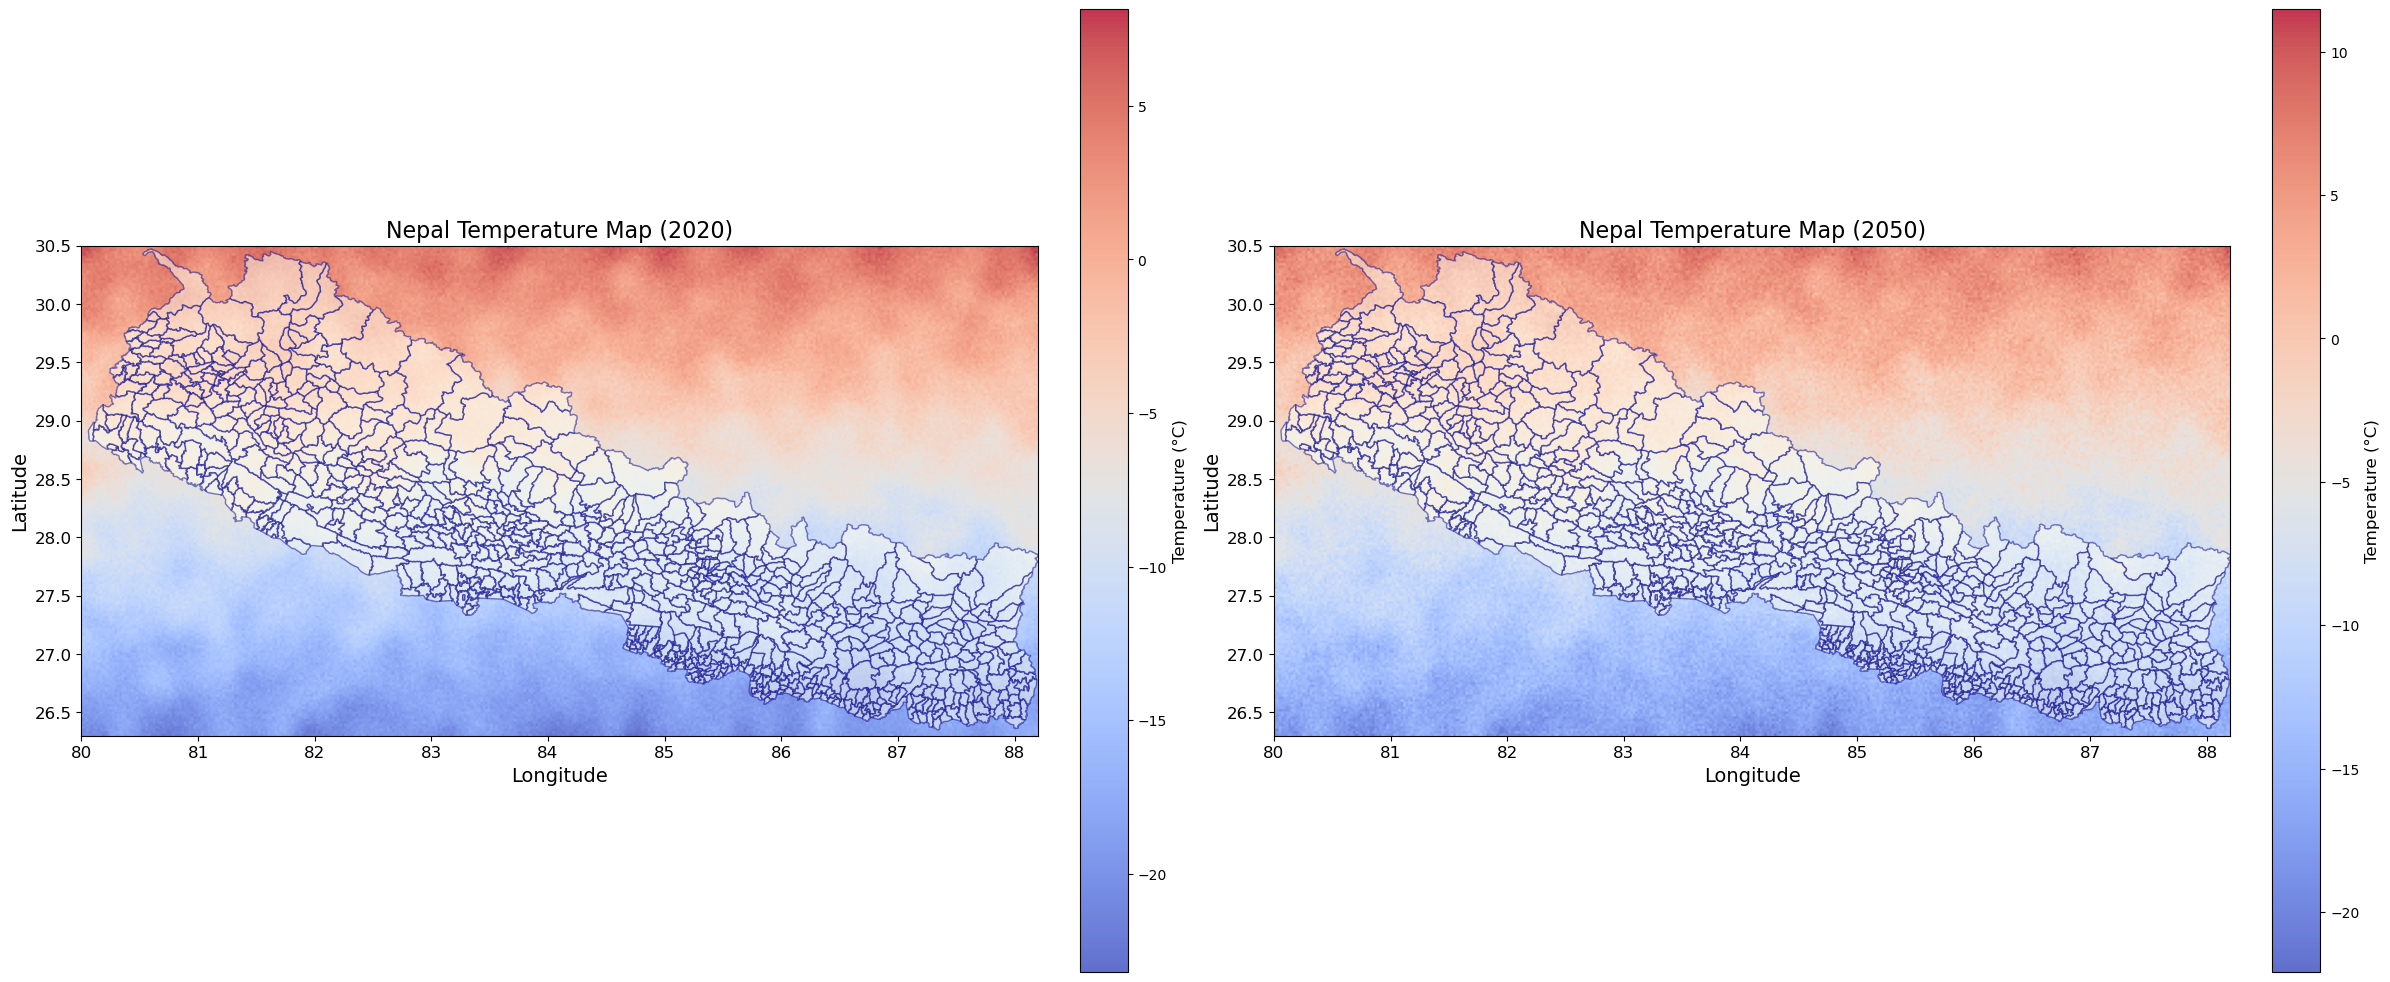

In [67]:
# Load temperature data 2020 (Geotiff)
temp_2020_path = r"./Nepal_climate_data/nepal_temperature_2020.tif"
with rasterio.open(temp_2020_path) as src:
    temp_2020 = src.read(1)  # Reading first band
    extent = src.bounds  # Setting bounding box for the data

# Load temperature data 2050 (Geotiff)
temp_2050_path = r"./Nepal_climate_data/nepal_temperature_2050.tif"
with rasterio.open(temp_2050_path) as src:
    temp_2050 = src.read(1)  # Reading first band

# Load Nepal map (shapefile)
climate_data = gpd.read_file(r"./Shape_Data/local_unit.shp")

# Create figure and axes with a larger size
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 12))

# Plot Nepal map (shapefile) for 2020
climate_data.plot(ax=ax1, edgecolor="darkblue", facecolor="ivory", alpha=0.5)
# Plot temperature data (TIFF) for 2020
im1 = ax1.imshow(temp_2020, cmap="coolwarm", extent=[extent.left, extent.right, extent.bottom, extent.top], alpha=0.8)
# Adding colorbar for 2020
cbar1 = plt.colorbar(im1, ax=ax1, orientation='vertical', fraction=0.046, pad=0.04)
cbar1.set_label("Temperature (°C)", fontsize=12)
cbar1.ax.tick_params(labelsize=10)
# Assigning Labels and title for 2020
ax1.set_title("Nepal Temperature Map (2020)", fontsize=16)
ax1.set_xlabel("Longitude", fontsize=14)
ax1.set_ylabel("Latitude", fontsize=14)
ax1.tick_params(axis='both', which='major', labelsize=12)

# Plot Nepal map (shapefile) for 2050
climate_data.plot(ax=ax2, edgecolor="darkblue", facecolor="ivory", alpha=0.5)
# Plot temperature data (TIFF) for 2050
im2 = ax2.imshow(temp_2050, cmap="coolwarm", extent=[extent.left, extent.right, extent.bottom, extent.top], alpha=0.8)
# Adding colorbar for 2050
cbar2 = plt.colorbar(im2, ax=ax2, orientation='vertical', fraction=0.046, pad=0.04)
cbar2.set_label("Temperature (°C)", fontsize=12)
cbar2.ax.tick_params(labelsize=10)
# Assigning Labels and title for 2050
ax2.set_title("Nepal Temperature Map (2050)", fontsize=16)
ax2.set_xlabel("Longitude", fontsize=14)
ax2.set_ylabel("Latitude", fontsize=14)
ax2.tick_params(axis='both', which='major', labelsize=12)

# Adjust layout
plt.tight_layout()

# Displaying visualization
plt.show()

## Statistical Analysis

In [23]:
temp_2020_flat = temp_2020.flatten()
temp_2050_flat = temp_2050.flatten()
print("Descriptive Statistics for 2020:")
print(pd.Series(temp_2020_flat).describe())

print("\nDescriptive Statistics for 2050:")
print(pd.Series(temp_2050_flat).describe())

Descriptive Statistics for 2020:
count    80000.000000
mean        -7.577416
std          7.295553
min        -23.198750
25%        -13.660651
50%         -7.685703
75%         -1.132268
max          8.138671
dtype: float64

Descriptive Statistics for 2050:
count    80000.000000
mean        -5.472907
std          7.159081
min        -22.087363
25%        -11.462427
50%         -5.578674
75%          0.818504
max         11.473132
dtype: float64


In [27]:

# Load temperature data 2020 (Geotiff)
temp_2020 = r"./Nepal_climate_data/nepal_temperature_2020.tif"
with rasterio.open(temp_2020) as src:
    temp_2020 = src.read(1)  # Reading first band

# Load temperature data 2050 (Geotiff)
temp_2050 = r"./Nepal_climate_data/nepal_temperature_2050.tif"
with rasterio.open(temp_2050) as src:
    temp_2050 = src.read(1)  # Reading first band

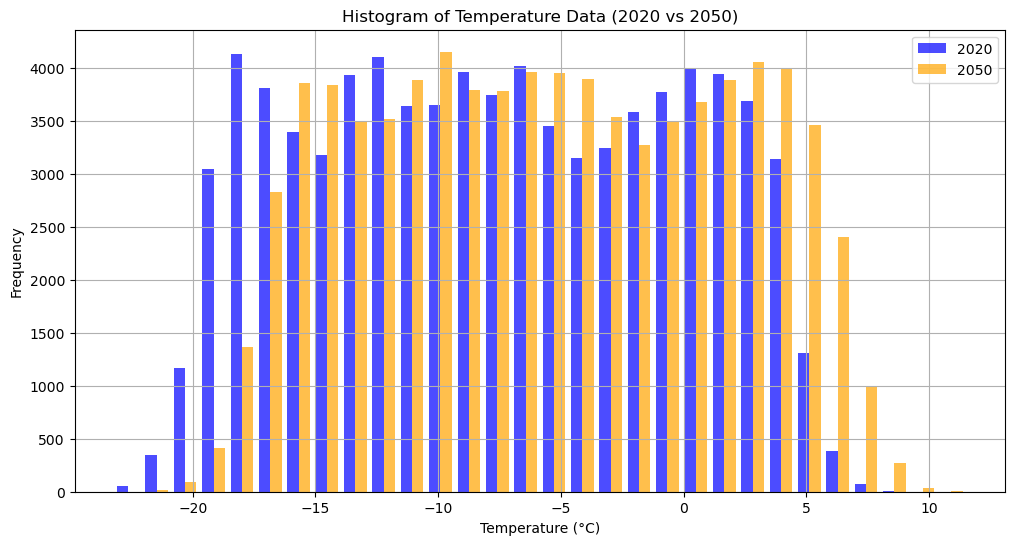

In [69]:
plt.figure(figsize=(12, 6))
plt.hist([temp_2020_flat, temp_2050_flat], bins=30, label=['2020', '2050'], color=['blue', 'orange'], alpha=0.7)
plt.title('Histogram of Temperature Data (2020 vs 2050)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

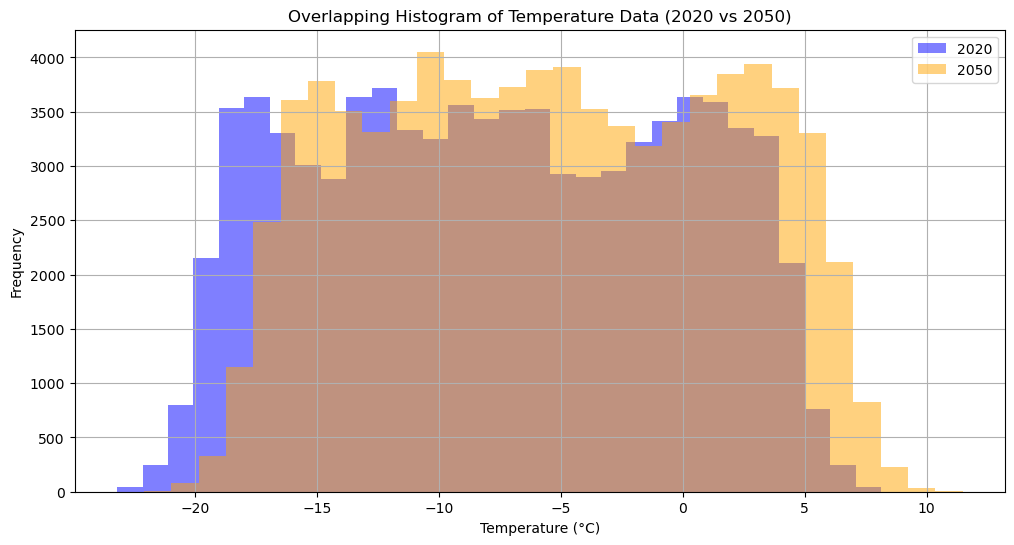

In [31]:
plt.figure(figsize=(12, 6))
plt.hist(temp_2020_flat, bins=30, alpha=0.5, label='2020', color='blue')
plt.hist(temp_2050_flat, bins=30, alpha=0.5, label='2050', color='orange')
plt.title('Overlapping Histogram of Temperature Data (2020 vs 2050)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

## Plotting: Data of River of Nepal with time

In [71]:
# Loading river data 
climate_river = gpd.read_file(r"./Nepal_climate_data/nepal_rivers.gpkg")

# Printing random sample data
climate_river.sample(4)

name  flow_2020  flow_2050  flow_reduction_pct  \
0     Koshi       2200       2000            9.090909   
3  Mahakali       1200       1050           12.500000   
2   Karnali       1600       1400           12.500000   
1   Gandaki       1800       1650            8.333333   

                                            geometry  
0  POLYGON ((86.00000 26.50000, 86.10000 26.50000...  
3  POLYGON ((80.00000 26.50000, 80.10000 26.50000...  
2  POLYGON ((81.00000 26.50000, 81.10000 26.50000...  
1  POLYGON ((84.00000 26.50000, 84.10000 26.50000...

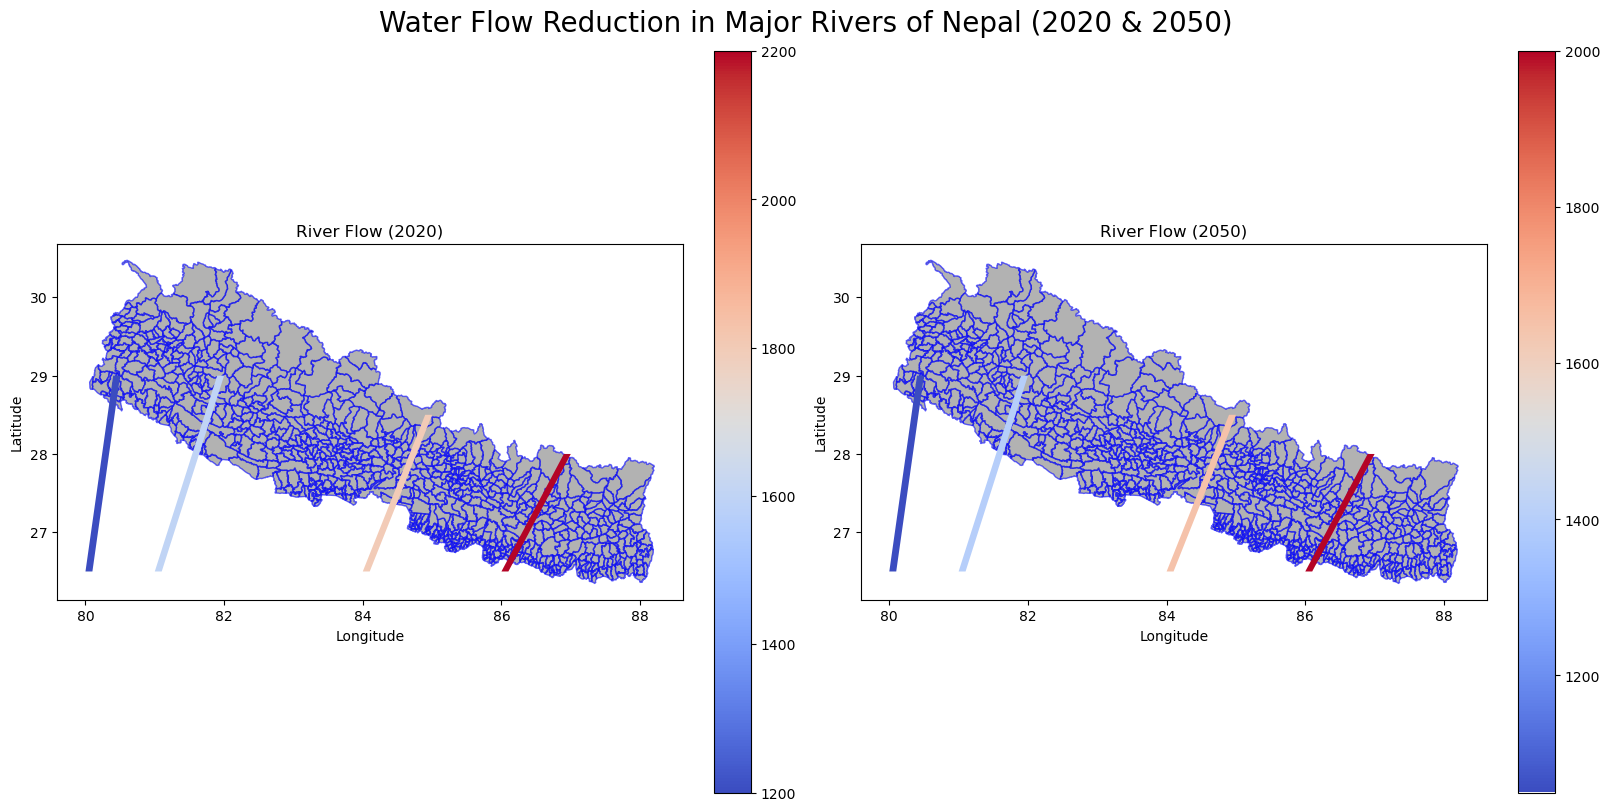

In [39]:
# Creating subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 8), constrained_layout=True)

# Ploting Nepal map with boundaries on both subplots
climate_data.plot(ax=ax[0], facecolor='grey', edgecolor='blue', alpha=0.6)
climate_data.plot(ax=ax[1], facecolor='grey', edgecolor='blue', alpha=0.6)

# Ploting river flow data for 2020
climate_river.plot(ax=ax[0], column='flow_2020', cmap='coolwarm', markersize=50, legend=True)
ax[0].set_title("River Flow (2020)")

# Ploting river flow data for 2050
climate_river.plot(ax=ax[1], column='flow_2050', cmap='coolwarm', markersize=50, legend=True)
ax[1].set_title("River Flow (2050)")

# Adding title
plt.suptitle("Water Flow Reduction in Major Rivers of Nepal (2020 & 2050)", fontsize=20)

# Setting axis labels
for a in ax:
    a.set_xlabel("Longitude")
    a.set_ylabel("Latitude")

# Displaying visualization
plt.show()

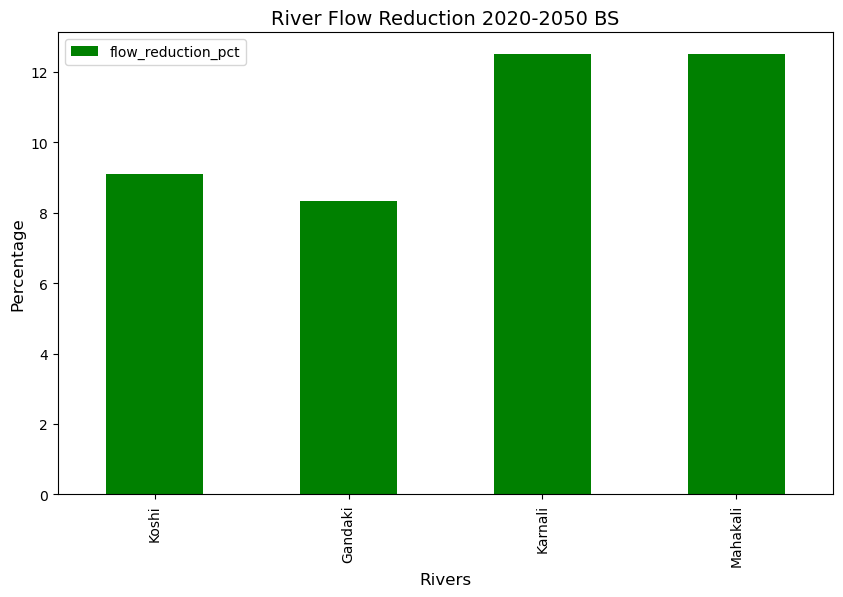

In [45]:
# Flow reduction percentage (2020-2050 BS)

# Deciding plot and figure size
fig, ax = plt.subplots(figsize=(10,6))
climate_river.plot.bar(x ='name', y = 'flow_reduction_pct', color='green', ax=ax)

# Setting title and axis
plt.title('River Flow Reduction 2020-2050 BS', fontsize=14)
plt.xlabel('Rivers', fontsize=12)
plt.ylabel('Percentage', fontsize=12)

# Displaying the visualizaiton
plt.show()

In [47]:
climate_river.describe()

flow_2020    flow_2050  flow_reduction_pct
count     4.0000     4.000000            4.000000
mean   1700.0000  1525.000000           10.606061
std     416.3332   401.040314            2.208694
min    1200.0000  1050.000000            8.333333
25%    1500.0000  1312.500000            8.901515
50%    1700.0000  1525.000000           10.795455
75%    1900.0000  1737.500000           12.500000
max    2200.0000  2000.000000           12.500000

## Summary of Major Findings

### Temperature Trends (2020 vs. 2050)

The mean temperature in Nepal is projected to rise from -7.58°C in 2020 to -5.47°C in 2050, indicating a warming trend.
The temperature distribution shifts toward higher temperatures, with an increased maximum temperature in 2050 (11.47°C vs. 8.14°C in 2020).
The overall temperature range narrows in 2050, suggesting less extreme cold temperatures.

### River Flow Trends (2020 vs. 2050)

All major rivers—Gandaki, Koshi, Mahakali, and Karnali—show a reduction in flow by 8.33% to 12.50% from 2020 to 2050.
The average river flow declines from 1700 to 1525 cubic meters per second, with Mahakali and Karnali experiencing the highest reductions (12.50%).
The decline in river flow suggests potential challenges for water availability, agriculture, and hydropower generation.
### Implications

Climate Change Impact: Rising temperatures and reduced river flows could significantly affect water resources, agriculture, and environmental sustainability.
Policy & Adaptation Needs: The findings highlight the necessity for adaptive measures to manage water resources effectively in Nepal.